# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people, one group follows the first diet and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

In [2]:
import scipy.stats as stats

#Hipotesis
'H0 : No hay diferencias significativas entre las medias (μ1= μ2)'
'H1 : hay diferencia significativa entre las medias (μ1 != μ2)'
'nivel de confianza 0.05'

diet1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]


statistic, pvalue = stats.ttest_ind(diet1, diet2)
print(f'Estadistico ={statistic}')
print(f'Pvalue = {pvalue}')
print('Al ser Pvalue menor que nuestro nivel de confianza podemos rechazar la hipotesis nula. Al tener un valor estadistico negativo nos indica que la media del grupo 2 es mayor por lo que a adelgazado más.')



Estadistico =-3.5383407969933938
Pvalue = 0.004083270191713912
Al ser Pvalue menor que nuestro nivel de confianza podemos rechazar la hipotesis nula. Al tener un valor estadistico negativo nos indica que la media del grupo 2 es mayor por lo que a adelgazado más.


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically are:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

### Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

Estadistico: 20.315789473684188, Pvalue: 0.004083270191713912
Al ser Pvalue menor que nuestro nivel de confianza podemos rechazar nuestra hipótesis nula
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.800     0.010    -3.143    -0.457
 (0 - 2)     -3.200     0.000    -4.543    -1.857
 (1 - 0)      1.800     0.010     0.457     3.143
 (1 - 2)     -1.400     0.041    -2.743    -0.057
 (2 - 0)      3.200     0.000     1.857     4.543
 (2 - 1)      1.400     0.041     0.057     2.743



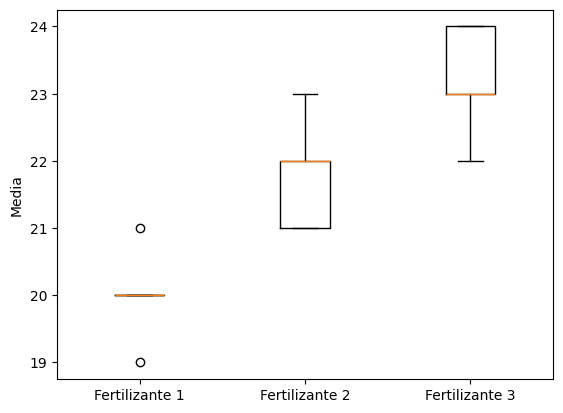

Conclusión: Como podemos ver en la función Tukey HSD el Pvalue es menor que nuestro margen de confianza, por lo que la diferencia entre las muestras es significativa. En nuestra gráfica vemos como el fertilizante 3 es el que mejores resulatados arroja.


In [19]:
import matplotlib.pyplot as plt
#Hipotesis
'H0 : La mediad e todos los grupos es igual (μ1= μ2= μ3 ) '
'H1 : Al menos una media es diferente (μ1 !=μ2 !=μ3)'
'Nivel de confianza 0.05'

fertilizante_1 = [20, 21, 20, 19, 20]
fertilizante_2 = [22, 21, 23, 22, 21]
fertilizante_3 = [24, 23, 22, 23, 24]

estadistico, pvalue = stats.f_oneway(fertilizante_1, fertilizante_2, fertilizante_3)

print(f'Estadistico: {estadistico}, Pvalue: {pvalue}')

print('Al ser Pvalue menor que nuestro nivel de confianza podemos rechazar nuestra hipótesis nula')

res = stats.tukey_hsd(fertilizante_1, fertilizante_2, fertilizante_3)

print(res)

fig, ax = plt.subplots(1, 1)
ax.boxplot([Fertilizante_1, Fertilizante_2, Fertilizante_3])
ax.set_xticklabels(["Fertilizante 1", "Fertilizante 2", "Fertilizante 3"]) 
ax.set_ylabel("Media") 
plt.show()

print('Conclusión: Como podemos ver en la función Tukey HSD el Pvalue es menor que nuestro margen de confianza, por lo que la diferencia entre las muestras es significativa. En nuestra gráfica vemos como el fertilizante 3 es el que mejores resulatados arroja.')
